In [1]:
%load_ext autoreload
%autoreload 2

In [18]:
from MTGA.MTGA import *

from MTGA.MTGAInstance import Instance
import MTGA.Generators as Generators
import MTGA.Mutators as Mutators
import MTGA.WeightGenerators as WeightGenerators
import Fixers as Fixers
import Evaluators as Evaluators

from MTGA.GeneVisualizer import GeneEvolutionRenderer
from Displayer import Displayer

from Utils import *


## Main Instance

In [19]:
instance = Instance("problems/p3.json",
    evaluator=Evaluators.CummulativeEvaluator(),
    mutator=Mutators.WalkMutator(),
    generator=Generators.Generator(),
    fixer=Fixers.ChoiceFixer(),
    weight_generator=WeightGenerators.SoftmaxWeights())

In [20]:
displayer = Displayer()
gene_displayer = GeneEvolutionRenderer()

## The Run

In [21]:
data = optimize_and_collect(instance)

[2025-02-02 21:48:24][  0]     1.93947053     1.93946600 {170.00000000 173.57920000 194.00000000   3.13638763}
[2025-02-02 21:48:26][  1]     3.60076976     1.65990520 {170.00000000 177.68660000 211.00000000   7.74458394}
[2025-02-02 21:48:27][  2]     5.24613667     1.64350796 {170.00000000 184.44630000 211.00000000  10.17740224}
[2025-02-02 21:48:29][  3]     7.04485679     1.79650211 {170.00000000 187.73870000 211.00000000  11.21743386}
[2025-02-02 21:48:31][  4]     9.15483952     2.10841131 {170.00000000 188.73280000 211.00000000  11.55182255}
[2025-02-02 21:48:33][  5]    10.96416283     1.80762458 {170.00000000 189.48400000 211.00000000  11.86738151}
[2025-02-02 21:48:35][  6]    12.81392241     1.84825277 {170.00000000 190.42270000 211.00000000  12.38732516}
[2025-02-02 21:48:37][  7]    14.65242624     1.83710480 {170.00000000 191.23450000 211.00000000  12.58800658}
[2025-02-02 21:48:38][  8]    16.49244666     1.83592343 {170.00000000 191.74740000 211.00000000  12.73252501}
[

In [22]:
evaluator = Evaluators.MainEvaluator()
solutions = [ (np.where(bool_array)[0].tolist(), evaluator(instance.problem, bool_array)) for bool_array, value in instance.solutions ]

## Results

In [25]:
best_solution, best_solutions_value = max(solutions, key=lambda x: x[1])
print(f"Best solution [{best_solutions_value}]:\n{best_solution}")

Best solution [0]:
[45, 57]


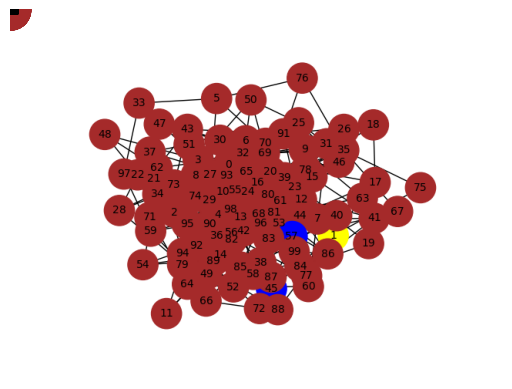

In [26]:
instance.problem.visualize_fire(displayer, best_solution)

In [ ]:
instance.problem.visualize_fires(displayer, solutions)

In [ ]:
gene_displayer.visualize(data)